In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = cv2.imread("20170311_172915.jpg")
img2 = cv2.imread("frc_live_grid_shot.jpg")

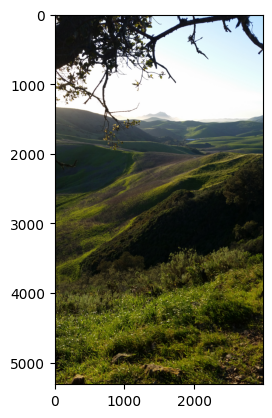

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

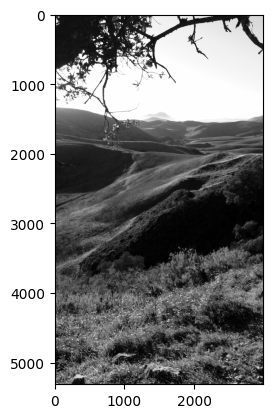

In [14]:
plt.imshow(img[:, :, 2], cmap="Greys_r")

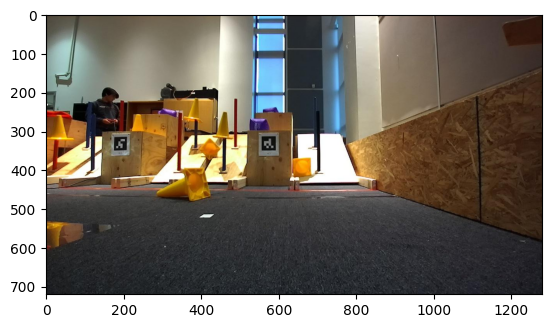

In [18]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

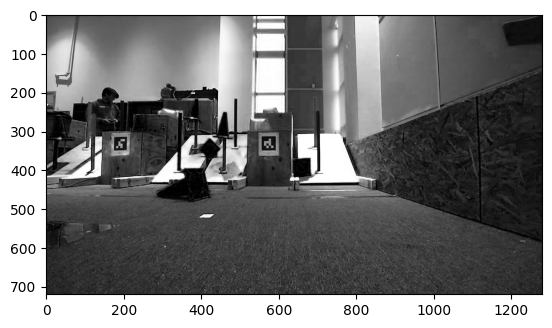

In [26]:
plt.imshow(img2[:, :, 0], cmap="Greys_r")

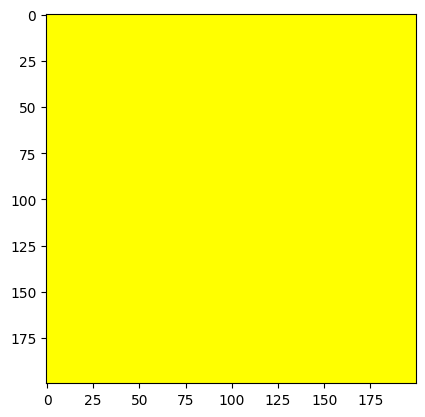

In [32]:
pure_yellow = np.ones((200, 200, 3), np.uint8)
pure_yellow[:, :, :] = np.array([255, 255, 0])
plt.imshow(pure_yellow)

C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14788\1816061837.py:3: RuntimeWarning: invalid value encountered in divide
  img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),


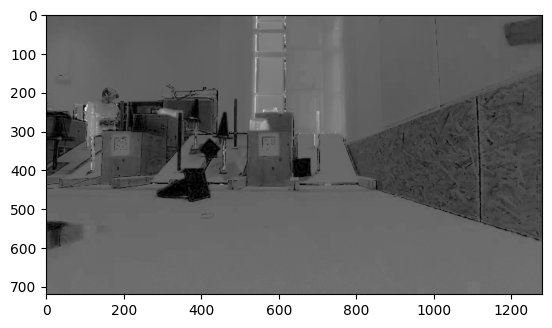

In [48]:
img_use = (img2  / 255.0)**0.75
chrom_coords = np.nan_to_num(
    img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
    0
)
plt.imshow(chrom_coords[:, :, ::-1][:, :, 2], cmap="Greys_r")

C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14788\3702241892.py:4: RuntimeWarning: invalid value encountered in divide
  img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


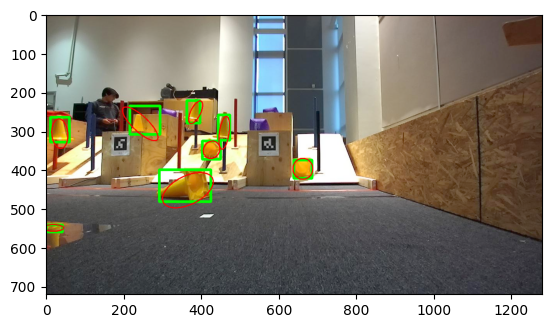

In [176]:
img_use = cv2.imread("frc_live_grid_shot.jpg")
img_use = (img_use  / 255.0)**0.75
chrom_coords = np.nan_to_num(
    img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
    0
)

cone_seg_thresh_b = (chrom_coords[:, :, 0] < 0.1) #0.1
cone_seg_thresh_g = (chrom_coords[:, :, 1] > 0.25) #0.3
cone_seg_thresh_r = (chrom_coords[:, :, 2] > 0.2) #0.5
cone_seg_thresh = cone_seg_thresh_b & cone_seg_thresh_g & cone_seg_thresh_r

opening_kernel = np.ones((3, 3), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((6, 6), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh, cv2.MORPH_CLOSE, closing_kernel)

opening_kernel = np.ones((6, 6), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((20, 20), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh, cv2.MORPH_CLOSE, closing_kernel)

cone_contours, cone_heirarchies = cv2.findContours(cone_seg_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cone_bounding_boxes = [cv2.boundingRect(cc) for cc in cone_contours]
cone_ellipses = [cv2.fitEllipse(cc) for cc in cone_contours]

for i in range(len(cone_contours)):
    top_left_x, top_left_y, width, height = cone_bounding_boxes[i]
    cv2.rectangle(
        img_use,
        (top_left_x, top_left_y), (top_left_x + width, top_left_y + height),
        (0, 255, 0),
        5
    )
    cv2.ellipse(img_use, cone_ellipses[i], (0, 0, 255), 2)

plt.imshow(img_use[:, :, ::-1])

C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14788\1132660031.py:4: RuntimeWarning: invalid value encountered in divide
  img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


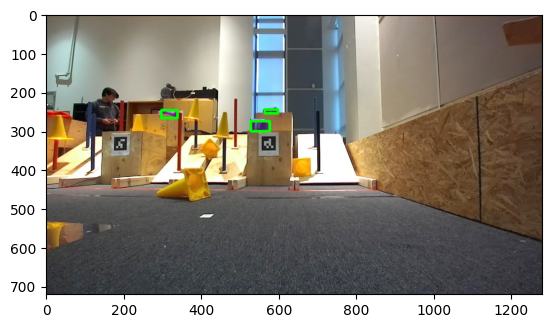

In [211]:
img_use = cv2.imread("frc_live_grid_shot.jpg")
img_use = (img_use  / 255.0)**0.75
chrom_coords = np.nan_to_num(
    img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
    0
)

cube_seg_thresh_b = (chrom_coords[:, :, 0] > 0.3) #0.4
cube_seg_thresh_g = (chrom_coords[:, :, 1] < 0.25) #0.3
cube_seg_thresh_r = (chrom_coords[:, :, 2] > 0.25) #0.25
cube_seg_thresh = cube_seg_thresh_b & cube_seg_thresh_g & cube_seg_thresh_r

opening_kernel = np.ones((4, 4), dtype=np.uint8)
cube_seg_thresh = cv2.morphologyEx(cube_seg_thresh.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((20, 20), dtype=np.uint8)
cube_seg_thresh = cv2.morphologyEx(cube_seg_thresh, cv2.MORPH_CLOSE, closing_kernel)

cube_contours, cube_heirarchies = cv2.findContours(cube_seg_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cube_bounding_boxes = [cv2.boundingRect(cc) for cc in cube_contours]

for i in range(len(cube_contours)):
    top_left_x, top_left_y, width, height = cube_bounding_boxes[i]
    cv2.rectangle(
        img_use,
        (top_left_x, top_left_y), (top_left_x + width, top_left_y + height),
        (0, 255, 0),
        5
    )

plt.imshow(img_use[:, :, ::-1])

C:\Users\jtd_2\AppData\Local\Temp\ipykernel_14788\2140590238.py:4: RuntimeWarning: invalid value encountered in divide
  img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


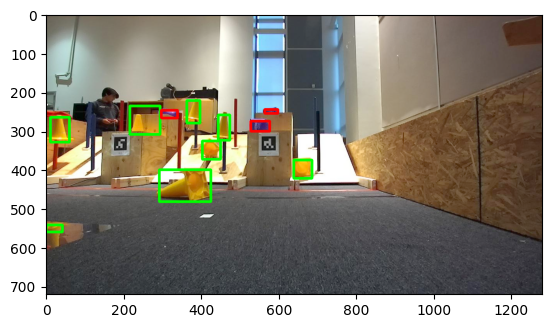

In [212]:
img_use = cv2.imread("frc_live_grid_shot.jpg")
img_use = (img_use  / 255.0)**0.75
chrom_coords = np.nan_to_num(
    img_use / np.repeat(np.sum(img_use, axis=2)[:, :, np.newaxis], repeats=img_use.shape[2], axis=2),
    0
)

cone_seg_thresh_b = (chrom_coords[:, :, 0] < 0.1) #0.1
cone_seg_thresh_g = (chrom_coords[:, :, 1] > 0.25) #0.3
cone_seg_thresh_r = (chrom_coords[:, :, 2] > 0.2) #0.5
cone_seg_thresh = cone_seg_thresh_b & cone_seg_thresh_g & cone_seg_thresh_r

opening_kernel = np.ones((3, 3), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((6, 6), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh, cv2.MORPH_CLOSE, closing_kernel)

opening_kernel = np.ones((6, 6), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((20, 20), dtype=np.uint8)
cone_seg_thresh = cv2.morphologyEx(cone_seg_thresh, cv2.MORPH_CLOSE, closing_kernel)

cone_contours, cone_heirarchies = cv2.findContours(cone_seg_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cone_bounding_boxes = [cv2.boundingRect(cc) for cc in cone_contours]
cone_ellipses = [cv2.fitEllipse(cc) for cc in cone_contours]

for i in range(len(cone_contours)):
    top_left_x, top_left_y, width, height = cone_bounding_boxes[i]
    cv2.rectangle(
        img_use,
        (top_left_x, top_left_y), (top_left_x + width, top_left_y + height),
        (0, 255, 0),
        5
    )

cube_seg_thresh_b = (chrom_coords[:, :, 0] > 0.3) #0.4
cube_seg_thresh_g = (chrom_coords[:, :, 1] < 0.25) #0.3
cube_seg_thresh_r = (chrom_coords[:, :, 2] > 0.25) #0.25
cube_seg_thresh = cube_seg_thresh_b & cube_seg_thresh_g & cube_seg_thresh_r

opening_kernel = np.ones((4, 4), dtype=np.uint8)
cube_seg_thresh = cv2.morphologyEx(cube_seg_thresh.astype(np.uint8), cv2.MORPH_OPEN, opening_kernel)

closing_kernel = np.ones((20, 20), dtype=np.uint8)
cube_seg_thresh = cv2.morphologyEx(cube_seg_thresh, cv2.MORPH_CLOSE, closing_kernel)

cube_contours, cube_heirarchies = cv2.findContours(cube_seg_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cube_bounding_boxes = [cv2.boundingRect(cc) for cc in cube_contours]

for i in range(len(cube_contours)):
    top_left_x, top_left_y, width, height = cube_bounding_boxes[i]
    cv2.rectangle(
        img_use,
        (top_left_x, top_left_y), (top_left_x + width, top_left_y + height),
        (0, 0, 255),
        5
    )

plt.imshow(img_use[:, :, ::-1])